In [1]:
! pip install shapely

In [2]:

from skimage import io, color, feature, morphology, measure
import os
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from skimage import util


# Function to extract features from an image
from shapely.geometry import Polygon

def extract_features(image_path):
    # Load the image as grayscale
    image = io.imread(image_path, as_gray=True)

    # Shape-based features
    contours = measure.find_contours(image, 0.5)
    contour = max(contours, key=len)  # Choose the longest contour
    perimeter = len(contour)
    poly = Polygon(contour)
    area = poly.area
    eccentricity = measure.regionprops(contour.astype(int))[0].eccentricity
    solidity = measure.regionprops(contour.astype(int))[0].solidity
    compactness = perimeter**2 / (4 * np.pi * area)

    # Texture-based features
    glcm = feature.graycomatrix((image * 255).astype(np.uint8), [1], [0], 256, symmetric=True, normed=True)
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]

    # Intensity-based features
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)

    return {
        'Perimeter': perimeter,
        'Area': area,
        'Eccentricity': eccentricity,
        'Solidity': solidity,
        'Compactness': compactness,
        'Contrast': contrast,
        'Energy': energy,
        'Homogeneity': homogeneity,
        'Correlation': correlation,
        'MeanIntensity': mean_intensity,
        'StdIntensity': std_intensity
    }

# Path to the folder containing the lung images
data_path = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\20 images\\"

# List of folders containing different types of lung images
folders = ['Normal cases', 'Bengin cases', 'Malignant cases']

# List to store the features and labels
features = []
labels = []

# Loop through each folder
for folder in folders:
    class_path = os.path.join(data_path, folder)
    if os.path.isdir(class_path):
        # Loop through each image in the folder
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            # Extract features from the image
            image_features = extract_features(image_path)
            features.append(image_features)
            labels.append(folder)

# Create a DataFrame to store the features and labels
df = pd.DataFrame(features)
df['Label'] = labels

# Save the DataFrame to a CSV file
df.to_csv('lung_image_features_20image.csv', index=False)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the CSV file containing the image features
df = pd.read_csv('lung_image_features.csv')
scaler = StandardScaler()
#df = scaler.fit_transform(df)
# Split the data into features (X) and labels (y)
X = df.drop('Label', axis=1)
X = scaler.fit_transform(X)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
print("Random Forest")
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


Random Forest
Accuracy: 0.9585253456221198
                 precision    recall  f1-score   support

   Bengin cases       0.75      0.86      0.80        21
Malignant cases       0.99      1.00      1.00       117
   Normal cases       0.97      0.92      0.95        79

       accuracy                           0.96       217
      macro avg       0.90      0.93      0.91       217
   weighted avg       0.96      0.96      0.96       217



In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.9049529190207156
Overall Recall: 0.9270644966847499
Overall F1-score: 0.914598876301004
Overall Accuracy: 0.9585253456221198


In [5]:

import pickle

# Save the model to disk
with open('random_forest_model_image_features_20image.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [6]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the CSV file containing the image features
# df = pd.read_csv('lung_image_features.csv')

# # Split the data into features (X) and labels (y)
# X = df.drop('Label', axis=1)
# y = df['Label']

from sklearn.preprocessing import LabelEncoder
# Create and train the model
le=LabelEncoder()
y_encoded=le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

# Train an XGBoost classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
print("XG Boost")
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


XG Boost
Accuracy: 0.9539170506912442
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       1.00      0.99      1.00       117
           2       0.95      0.94      0.94        79

    accuracy                           0.95       217
   macro avg       0.90      0.91      0.90       217
weighted avg       0.96      0.95      0.95       217



In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.8959494611668525
Overall Recall: 0.9125618872454315
Overall F1-score: 0.9037035288231264
Overall Accuracy: 0.9539170506912442


In [8]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 3: Evaluation
y_pred = svm_model.predict(X_test)
print("SVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=folders))

SVM Results:
Confusion Matrix:
[[  1   1  19]
 [  0 115   2]
 [  0   1  78]]

Classification Report:
                 precision    recall  f1-score   support

   Normal cases       1.00      0.05      0.09        21
   Bengin cases       0.98      0.98      0.98       117
Malignant cases       0.79      0.99      0.88        79

       accuracy                           0.89       217
      macro avg       0.92      0.67      0.65       217
   weighted avg       0.91      0.89      0.86       217



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.9235949235949237
Overall Recall: 0.6726222675589764
Overall F1-score: 0.650073189399032
Overall Accuracy: 0.8940092165898618


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn)) 

# Save the model to disk
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)


KNN Results:
[[ 16   0   5]
 [  0 116   1]
 [  3   2  74]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.98      0.99      0.99       117
           2       0.93      0.94      0.93        79

    accuracy                           0.95       217
   macro avg       0.92      0.90      0.91       217
weighted avg       0.95      0.95      0.95       217



In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')
accuracy = accuracy_score(y_test, y_pred_knn)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.9167187035385073
Overall Recall: 0.8966888713724157
Overall F1-score: 0.9060172175386949
Overall Accuracy: 0.9493087557603687


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb)) 

# Save the model to disk
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


Naive Bayes Results:
[[  2  17   2]
 [  1 113   3]
 [  2  53  24]]
              precision    recall  f1-score   support

           0       0.40      0.10      0.15        21
           1       0.62      0.97      0.75       117
           2       0.83      0.30      0.44        79

    accuracy                           0.64       217
   macro avg       0.62      0.45      0.45       217
weighted avg       0.67      0.64      0.58       217



In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred_nb, average='macro')
recall = recall_score(y_test, y_pred_nb, average='macro')
f1 = f1_score(y_test, y_pred_nb, average='macro')
accuracy = accuracy_score(y_test, y_pred_nb)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.6150241818981219
Overall Recall: 0.45494917646816385
Overall F1-score: 0.4505413105413106
Overall Accuracy: 0.6405529953917051


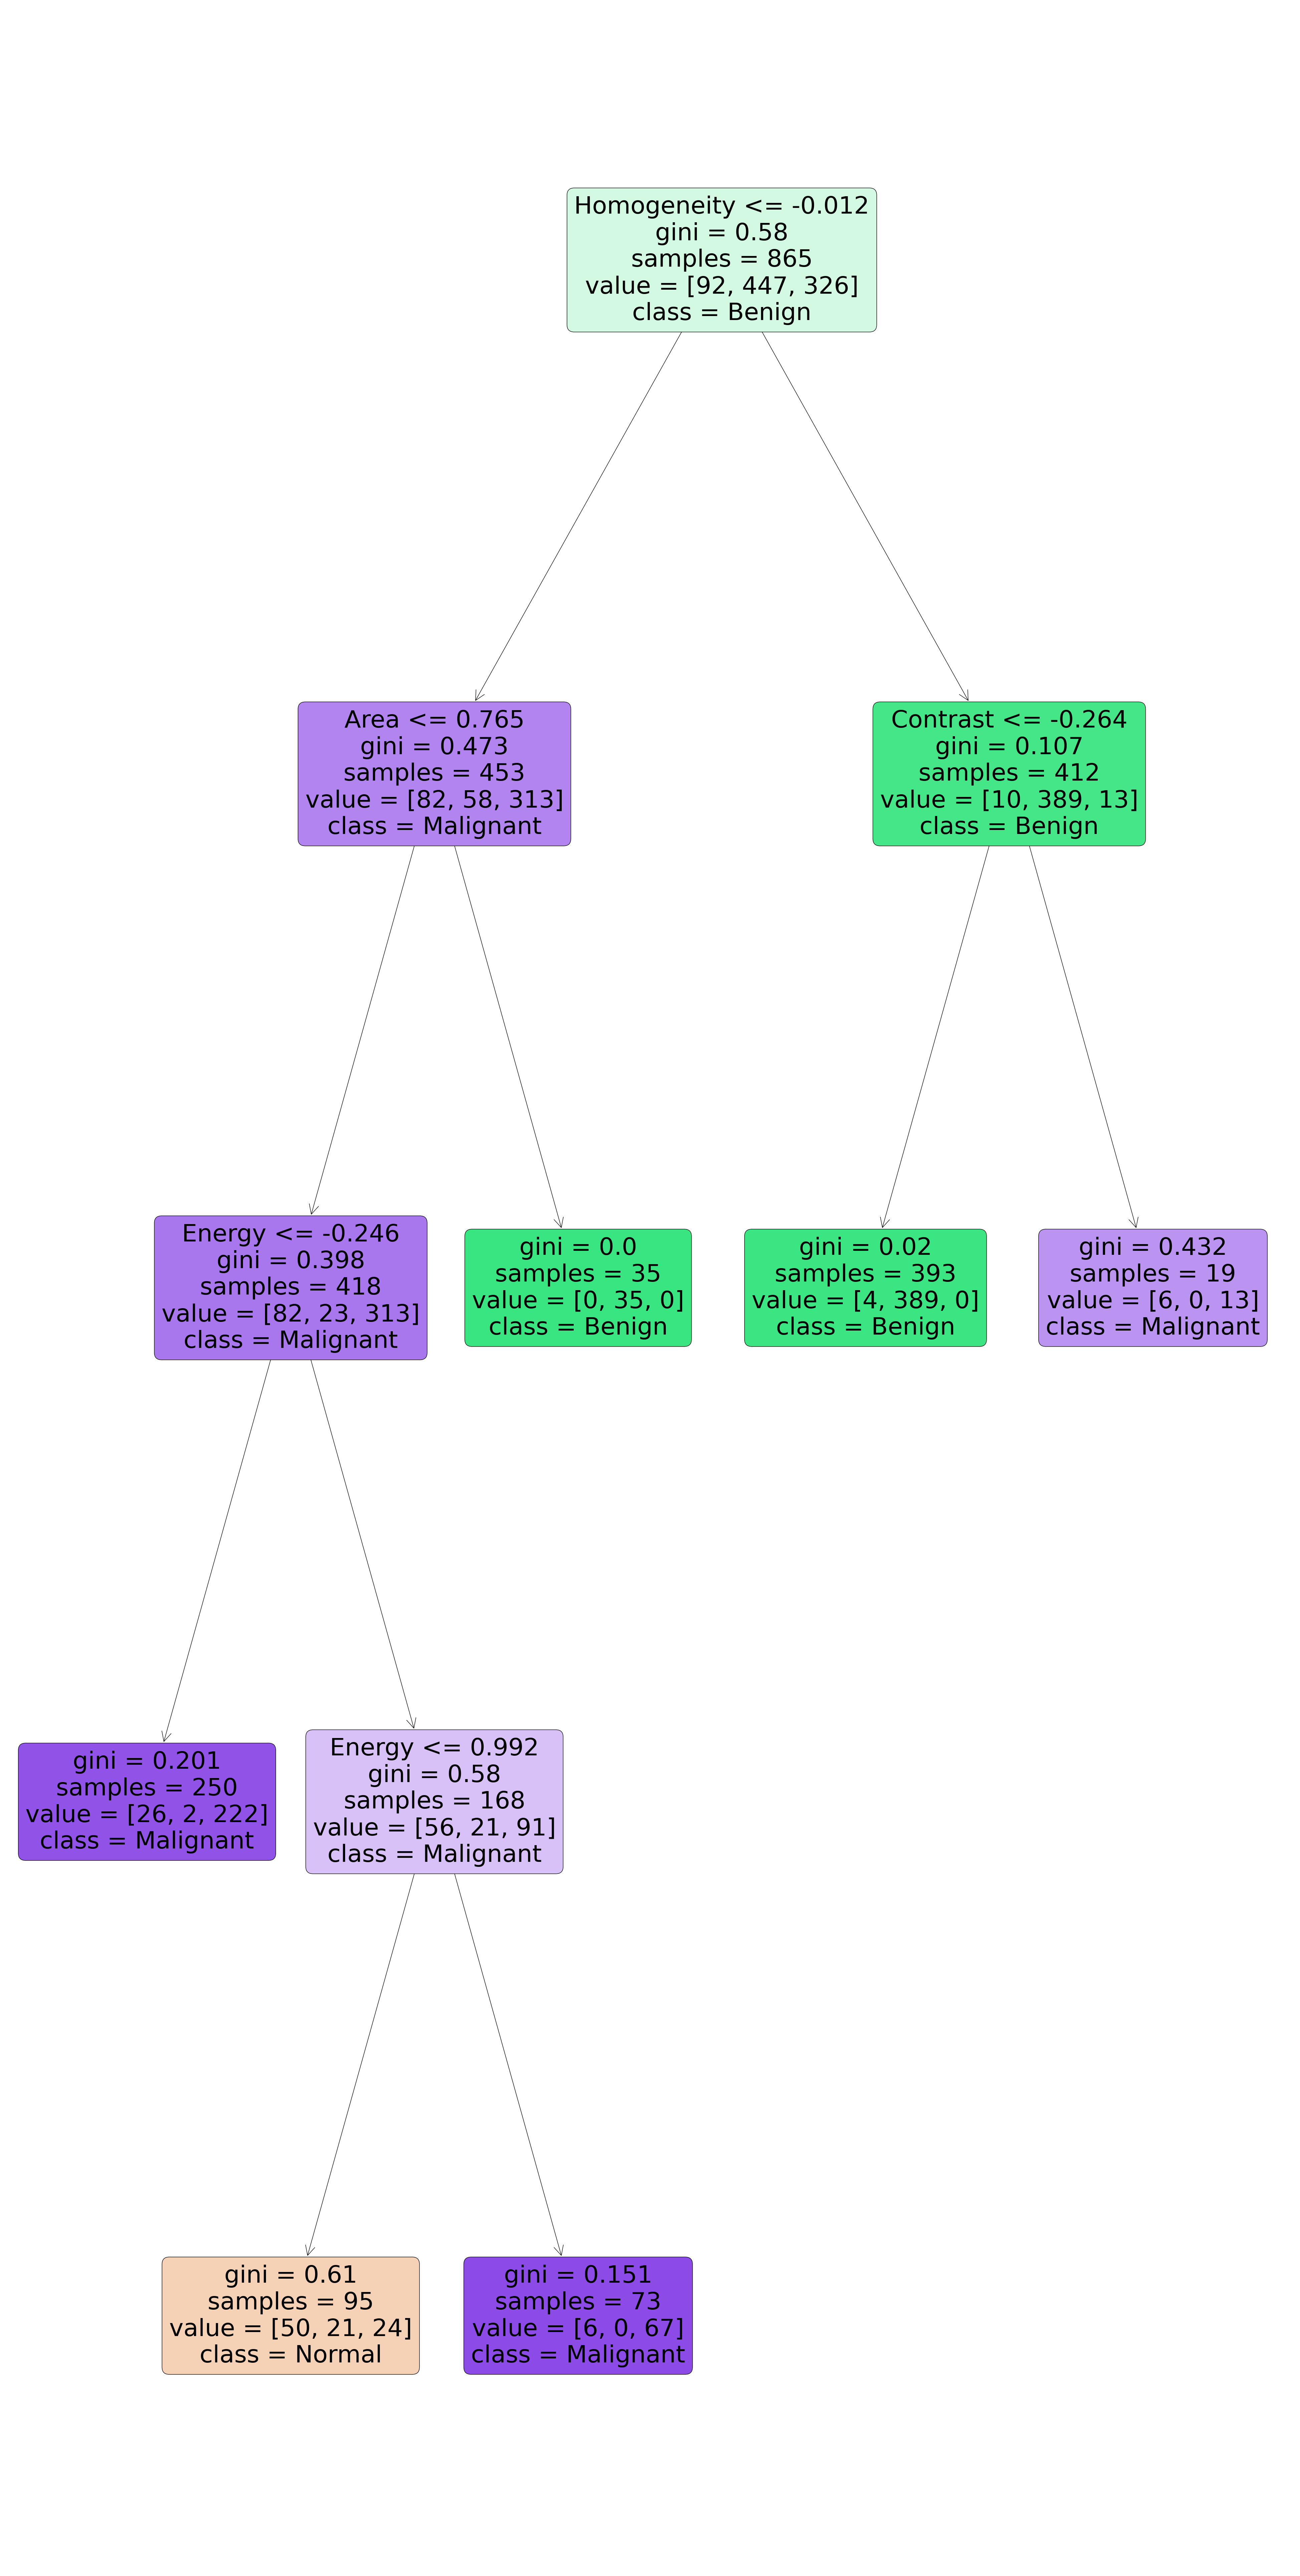

Accuracy: 0.8709677419354839
                 precision    recall  f1-score   support

   Bengin cases       0.52      0.61      0.56        23
Malignant cases       0.96      0.93      0.94       109
   Normal cases       0.87      0.87      0.87        85

       accuracy                           0.87       217
      macro avg       0.78      0.80      0.79       217
   weighted avg       0.88      0.87      0.87       217



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the image features
df = pd.read_csv('lung_image_features.csv')

# # Split the data into features (X) and labels (y)
X = df.drop('Label', axis=1)
y = df['Label']
X_old=X
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(50, 100))
plot_tree(clf, filled=True, feature_names=X_old.columns, class_names=['Normal', 'Benign', 'Malignant'],fontsize=52, rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1)
print("Overall Accuracy:", accuracy)


Overall Precision: 0.5384375177425765
Overall Recall: 0.6003237992444684
Overall F1-score: 0.5633987547801903
Overall Accuracy: 0.8018433179723502


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Load the trained classifier

with open('random_forest_model_image_features.pkl', 'rb') as f:
    clf = pickle.load(f)

# Path to the input image
input_image_path = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Test image\\Normal cases\\Normal case (95).jpg"
#"C:\Users\Aneesh PB\Downloads\Topology Project\Single Image\Malignant case (95).jpg"
# Extract features from the input image
input_image_features = extract_features(input_image_path)

# Create a DataFrame from the input image features
input_df = pd.DataFrame([input_image_features])

# Predict the class label of the input image
predicted_label = clf.predict(input_df)[0]
print(f"Predicted Label: {predicted_label}")


Predicted Label: Normal cases


In [17]:

with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

In [18]:
type(y)

pandas.core.series.Series

In [19]:
df_stand=pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]),columns=X_old.columns)
df_stand

,Perimeter,Area,Eccentricity,Solidity,Compactness,Contrast,Energy,Homogeneity,Correlation,MeanIntensity,StdIntensity
0,-0.294285,0.001417,0.22469,0.437603,-0.194297,-0.228757,0.273640,-0.561406,0.238761,-0.403606,0.303900
1,-0.855303,-0.145728,0.22469,0.437603,-0.211048,-0.248242,-0.465719,-0.555735,0.222661,-1.361170,-1.701185
2,-0.732340,-1.671452,0.22469,0.437603,0.211174,1.854889,0.969529,-1.502642,-2.410050,-1.251033,-2.265445
3,-0.424933,-0.434551,0.22469,0.437603,-0.167967,2.257348,0.939877,-1.512702,-2.541474,-0.826935,-1.157931
4,-0.624748,-0.431058,0.22469,0.437603,-0.179440,1.980588,0.934336,-1.491915,-2.267275,-0.890906,-1.274526
...,...,...,...,...,...,...,...,...,...,...,...
1077,-0.394192,-0.227969,0.22469,0.437603,-0.183580,-0.292348,1.790920,0.936142,0.289637,-1.076385,-0.560921
1078,-0.401877,-0.226102,0.22469,0.437603,-0.184110,-0.293895,1.786373,0.939642,0.291196,-1.072740,-0.565774
1079,-0.409563,-0.216720,0.22469,0.437603,-0.185194,-0.295907,1.755207,0.889803,0.293434,-1.053486,-0.553153
1080,-0.440303,-0.212994,0.22469,0.437603,-0.187013,-0.293117,1.758927,0.867091,0.290939,-1.045086,-0.519529


In [20]:
df_stand=df_stand.join(pd.DataFrame(y))

In [21]:
df.iloc[:,:-1]

,Perimeter,Area,Eccentricity,Solidity,Compactness,Contrast,Energy,Homogeneity,Correlation,MeanIntensity,StdIntensity
0,1461,91536.037601,1.0,1.0,1.855660,101.483519,0.129609,0.310842,0.991518,0.390771,0.303109
1,1315,85144.097224,1.0,1.0,1.616170,90.568038,0.093050,0.311448,0.990730,0.344790,0.273881
2,1347,18867.201728,1.0,1.0,7.652755,1268.754625,0.164019,0.210317,0.861990,0.350079,0.265656
3,1427,72597.760353,1.0,1.0,2.232106,1494.214163,0.162552,0.209242,0.855564,0.370443,0.281800
4,1375,72749.483947,1.0,1.0,2.068072,1339.171810,0.162278,0.211462,0.868972,0.367372,0.280100
...,...,...,...,...,...,...,...,...,...,...,...
1077,1435,81571.601276,1.0,1.0,2.008884,65.859356,0.204634,0.470783,0.994005,0.358465,0.290502
1078,1433,81652.683230,1.0,1.0,2.001299,64.992585,0.204409,0.471157,0.994082,0.358640,0.290432
1079,1431,82060.250568,1.0,1.0,1.985805,63.865693,0.202868,0.465834,0.994191,0.359565,0.290616
1080,1423,82222.113883,1.0,1.0,1.959798,65.428564,0.203052,0.463408,0.994069,0.359968,0.291106
